In [1]:
# importing Libriries

# Importing pandas and numpy for data wrangaling and numerical operations.
import pandas as pd
import numpy as np

# Importing matplotlib and seaborn for Visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# To avoid warnings.
import warnings
warnings.filterwarnings('ignore')

#to explore data, estimate statistical models, and perform statistical tests.
import statsmodels.api as sm
import scipy.stats as stats

# hyperparameter tuning using Grid search
from sklearn.model_selection import GridSearchCV 

# Libraries for Model building
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Librarie for HTML outline of Ml Pipeline.
from sklearn import set_config
set_config(display= 'diagram')

from sklearn.feature_selection import SelectKBest,chi2

# Importing varies Algorithims.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Importing performance validation metrics.
from sklearn.metrics import accuracy_score, confusion_matrix ,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report

# Importing smote for oversampling minority class.
from imblearn.over_sampling import SMOTE


In [2]:
# Loding data 
df = pd.read_excel(r"C:\Users\lenovo\OneDrive\Desktop\Assigenment\DataSet for the Data Science Test (1).xlsx")

# Making deep copy in new dataframe 'Origional_df'
origional_df = df.copy()                   
df

,CompanyName,Financial Department,Financial AccountGroup,VendorName,Amount Month 1,Amount Month 2,Amount Month 3,Amount Month 4,Category
0,B0,D0,C0,E0,930.076541,897.167475,855.332105,837.175251,X0
1,B0,D0,C0,E1,929.726216,897.167475,856.459905,837.175251,X0
2,B0,D0,C0,E2,930.076541,897.167475,856.459905,837.096763,X0
3,B0,D0,C0,E3,926.513586,897.167475,856.459905,837.175251,X0
4,B0,D0,C1,E4,930.076541,897.167475,856.459905,836.399490,X0
...,...,...,...,...,...,...,...,...,...
4715,B8,D15,C4,E1505,816.780325,846.908198,747.866497,738.087166,NaN
4716,B8,D15,C4,E1506,743.441494,804.010713,666.495417,657.722959,NaN
4717,B8,D15,C4,E1507,801.134982,837.856874,794.708694,837.175251,NaN
4718,B8,D15,C4,E486,930.076541,897.167475,856.459905,832.326991,NaN


In [3]:
# Knowing shape of dataframe
df.shape

(4720, 9)

In [4]:
df.columns

Index(['CompanyName', 'Financial Department', 'Financial AccountGroup',
       'VendorName', 'Amount Month 1', 'Amount Month 2', 'Amount Month 3',
       'Amount Month 4', 'Category'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4720 entries, 0 to 4719
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CompanyName             4720 non-null   object 
 1   Financial Department    4720 non-null   object 
 2   Financial AccountGroup  4720 non-null   object 
 3   VendorName              4720 non-null   object 
 4   Amount Month 1          4717 non-null   float64
 5   Amount Month 2          4719 non-null   float64
 6   Amount Month 3          4718 non-null   float64
 7   Amount Month 4          4719 non-null   float64
 8   Category                3695 non-null   object 
dtypes: float64(4), object(5)
memory usage: 332.0+ KB


In [6]:
df.describe()

,Amount Month 1,Amount Month 2,Amount Month 3,Amount Month 4
count,4717.000000,4.719000e+03,4718.000000,4.719000e+03
mean,911.547581,8.862468e+02,832.403176,8.150937e+02
std,59.723420,4.410200e+01,62.674567,5.601395e+01
min,0.000000,4.821640e-14,0.000000,4.821640e-14
25%,927.517998,8.954633e+02,845.248172,8.259513e+02
50%,930.076541,8.971675e+02,856.177985,8.367251e+02
75%,930.076541,8.971675e+02,856.459905,8.371753e+02
max,1163.521001,1.303063e+03,1237.874227,1.116251e+03


In [7]:
df.isnull().sum()

CompanyName                  0
Financial Department         0
Financial AccountGroup       0
VendorName                   0
Amount Month 1               3
Amount Month 2               1
Amount Month 3               2
Amount Month 4               1
Category                  1025
dtype: int64

<AxesSubplot:>

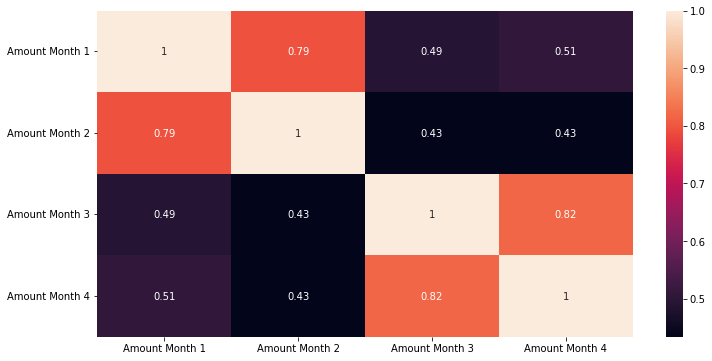

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

Above two plots shaow that there is linear reationship among  independent variables.
1. Amount month 3 is highly linearly related with Amount month 4
2. Amount month 1 is linearly dependent in Amount month 2

### Analysing the numerical variables 

### Variable: Amount Month 1

In [9]:
df['Amount Month 1'].describe()

count    4717.000000
mean      911.547581
std        59.723420
min         0.000000
25%       927.517998
50%       930.076541
75%       930.076541
max      1163.521001
Name: Amount Month 1, dtype: float64

((array([-3.62080759, -3.38458147, -3.25433924, ...,  3.25433924,
          3.38458147,  3.62080759]),
  array([ 0.,  0.,  0., ..., nan, nan, nan])),
 (nan, nan, nan))

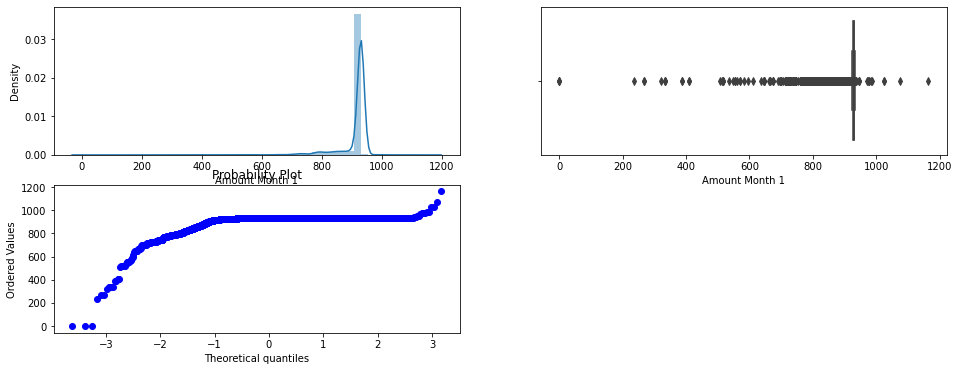

In [10]:
# seeing the distribution of data
plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
sns.distplot(df['Amount Month 1'])
plt.subplot(2,2,2)
sns.boxplot(df['Amount Month 1'])
plt.subplot(2,2,3)
stats.probplot(df['Amount Month 1'], dist = 'norm', plot = plt)


Inference : The distribution of above column is left skewed also it has many outliers 

In [11]:
df['Amount Month 1']

0       930.076541
1       929.726216
2       930.076541
3       926.513586
4       930.076541
           ...    
4715    816.780325
4716    743.441494
4717    801.134982
4718    930.076541
4719    930.076541
Name: Amount Month 1, Length: 4720, dtype: float64

In [12]:
df['Amount Month 1'].median()


930.0765408

In [13]:
df['Amount Month 1'] .isnull().sum()

3

In [14]:
df['Amount Month 1'] = df['Amount Month 1'].fillna(df['Amount Month 1'].median())


In [15]:
df['Amount Month 1'] .isnull().sum()

0

((array([-3.62080759, -3.38458147, -3.25433924, ...,  3.25433924,
          3.38458147,  3.62080759]),
  array([0.        , 0.        , 0.        , ..., 6.93218538, 6.98048263,
         7.06006512])),
 (0.05741916984674294, 6.8100917435905854, 0.3051002937082612))

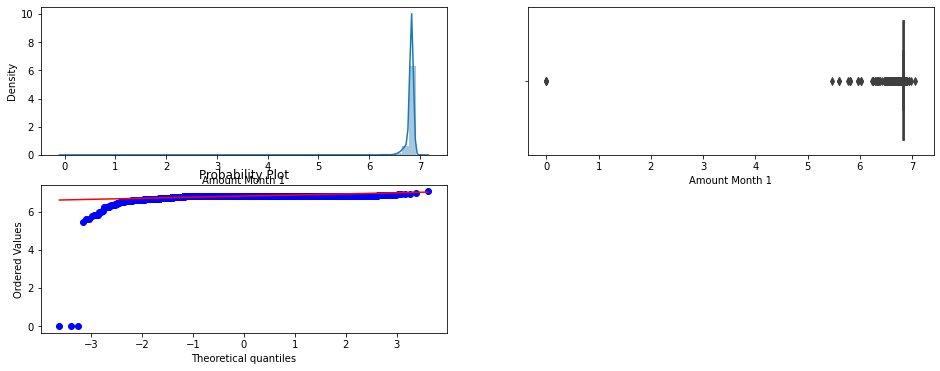

In [16]:
'''
we have to use feature scaling(log Transform) here because we large number of amounts in small amout where 
as few values have larger in magnitude 
'''
df['Amount Month 1']  = np.log1p(df['Amount Month 1'])

plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
sns.distplot(df['Amount Month 1'])
plt.subplot(2,2,2)
sns.boxplot(df['Amount Month 1'])
plt.subplot(2,2,3)
stats.probplot(df['Amount Month 1'], dist = 'norm', plot = plt)

There is some impact of Log transform on above column.

In [17]:
df['Amount Month 1'] # seeing the the scalled values

0       6.836341
1       6.835965
2       6.836341
3       6.832507
4       6.836341
          ...   
4715    6.706594
4716    6.612634
4717    6.687277
4718    6.836341
4719    6.836341
Name: Amount Month 1, Length: 4720, dtype: float64

###  Variable : Amount Month 2

In [18]:
df['Amount Month 2'].isna().sum()

1

((array([-3.62080759, -3.38458147, -3.25433924, ...,  3.25433924,
          3.38458147,  3.62080759]),
  array([4.82164000e-14, 4.82164000e-14, 4.82164000e-14, ...,
         1.04116223e+03, 1.30306334e+03,            nan])),
 (nan, nan, nan))

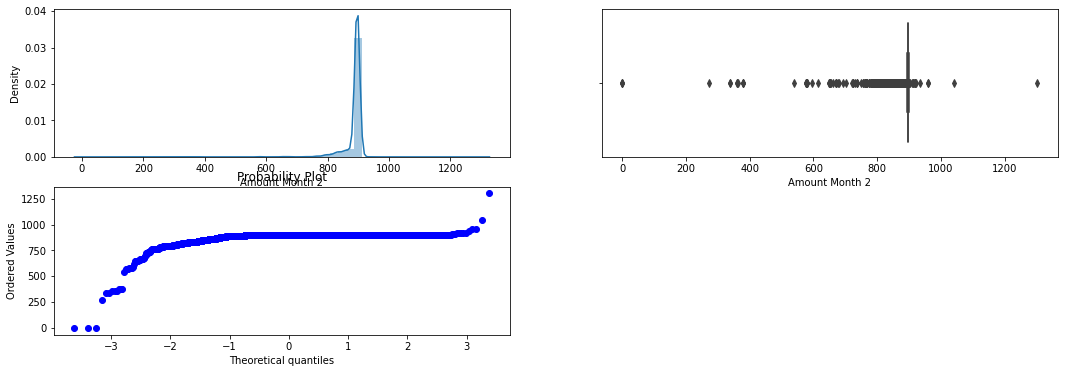

In [19]:
plt.figure(figsize=(18,6))
plt.subplot(2,2,1)
sns.distplot(df['Amount Month 2'])
plt.subplot(2,2,2)
sns.boxplot(df['Amount Month 2'])
plt.subplot(2,2,3)
stats.probplot(df['Amount Month 2'], dist = 'norm', plot = plt)

In [20]:
df['Amount Month 2'].median()

897.1674750000001

In [21]:
df['Amount Month 2'] = df['Amount Month 2'].fillna(df['Amount Month 2'].median())

In [22]:
df['Amount Month 2'].isna().sum()

0

((array([-3.62080759, -3.38458147, -3.25433924, ...,  3.25433924,
          3.38458147,  3.62080759]),
  array([0.        , 0.        , 0.        , ..., 6.93218538, 6.98048263,
         7.06006512])),
 (0.05741916984674294, 6.8100917435905854, 0.3051002937082612))

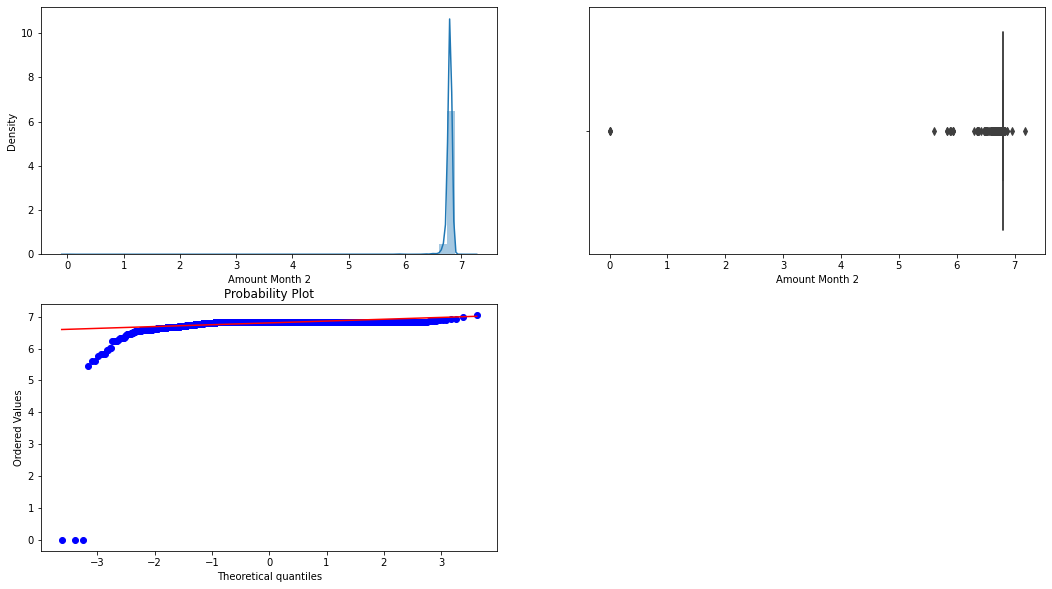

In [23]:
'''
we have to use feature scaling here because we significant number transations in samll amout where 
as few transations have larger magnitude .
'''
df['Amount Month 2']  = np.log1p(df['Amount Month 2'])

plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.distplot(df['Amount Month 2'])
plt.subplot(2,2,2)
sns.boxplot(df['Amount Month 2'])
plt.subplot(2,2,3)
stats.probplot(df['Amount Month 1'], dist = 'norm', plot = plt)

### Variable : Amount Month 3

In [24]:
df['Amount Month 3'].describe()

count    4718.000000
mean      832.403176
std        62.674567
min         0.000000
25%       845.248172
50%       856.177985
75%       856.459905
max      1237.874227
Name: Amount Month 3, dtype: float64

((array([-3.62080759, -3.38458147, -3.25433924, ...,  3.25433924,
          3.38458147,  3.62080759]),
  array([   0.      ,    0.      ,  132.360359, ..., 1237.874227,
                 nan,         nan])),
 (nan, nan, nan))

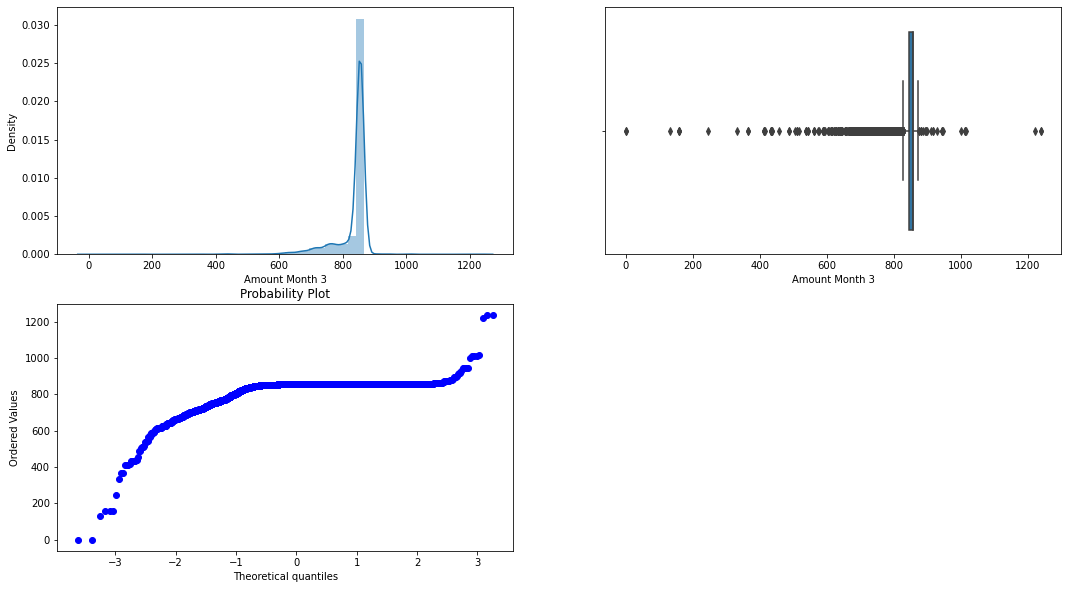

In [25]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.distplot(df['Amount Month 3'])
plt.subplot(2,2,2)
sns.boxplot(df['Amount Month 3'])
plt.subplot(2,2,3)
stats.probplot(df['Amount Month 3'], dist = 'norm', plot = plt)

In [26]:
df['Amount Month 3'].isna().sum()

2

In [27]:
df['Amount Month 3'].median()

856.1779849999999

In [28]:
df['Amount Month 3'] = df['Amount Month 3'].fillna(df['Amount Month 3'].median())

In [29]:
df['Amount Month 3'].isna().sum()

0

((array([-3.62080759, -3.38458147, -3.25433924, ...,  3.25433924,
          3.38458147,  3.62080759]),
  array([0.        , 0.        , 4.89305493, ..., 7.10764037, 7.12195836,
         7.12195836])),
 (0.06792619743101455, 6.719530793647477, 0.4064669014748729))

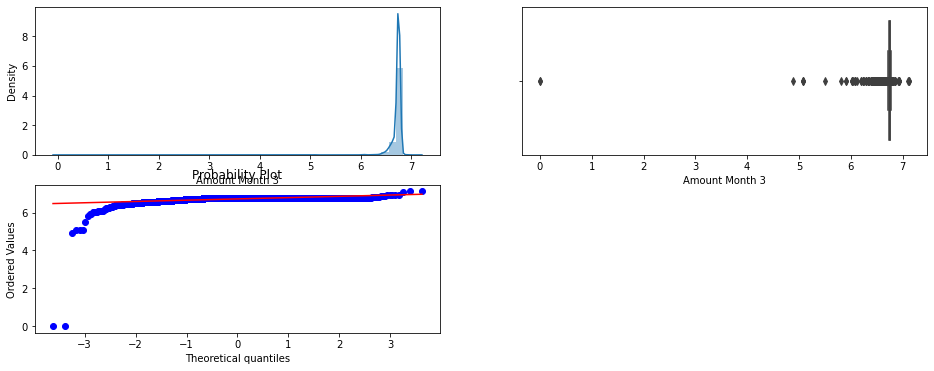

In [30]:
df['Amount Month 3']  = np.log1p(df['Amount Month 3'])

plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
sns.distplot(df['Amount Month 3'])
plt.subplot(2,2,2)
sns.boxplot(df['Amount Month 3'])
plt.subplot(2,2,3)
stats.probplot(df['Amount Month 3'], dist = 'norm', plot = plt)

Here also we can see impact of log transform on above column.

### Variable : Amount Month 4

In [31]:
df['Amount Month 4'].describe()

count    4.719000e+03
mean     8.150937e+02
std      5.601395e+01
min      4.821640e-14
25%      8.259513e+02
50%      8.367251e+02
75%      8.371753e+02
max      1.116251e+03
Name: Amount Month 4, dtype: float64

((array([-3.62080759, -3.38458147, -3.25433924, ...,  3.25433924,
          3.38458147,  3.62080759]),
  array([4.82164000e-14, 4.82164000e-14, 2.12316068e+02, ...,
         1.11625067e+03, 1.11625067e+03,            nan])),
 (nan, nan, nan))

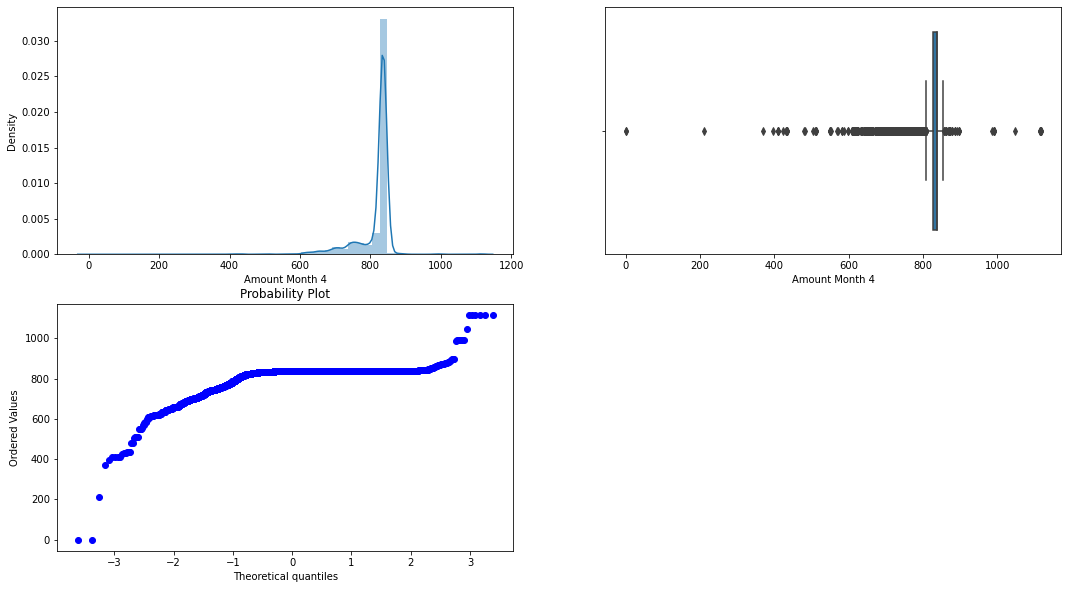

In [32]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.distplot(df['Amount Month 4'])
plt.subplot(2,2,2)
sns.boxplot(df['Amount Month 4'])
plt.subplot(2,2,3)
stats.probplot(df['Amount Month 4'], dist = 'norm', plot = plt)

In [33]:
df['Amount Month 4'].isna().sum()

1

In [34]:
df['Amount Month 4'].median()

836.725104

In [35]:
df['Amount Month 4'] = df['Amount Month 4'].fillna(df['Amount Month 4'].median())

In [36]:
df['Amount Month 4'].isna().sum()

0

((array([-3.62080759, -3.38458147, -3.25433924, ...,  3.25433924,
          3.38458147,  3.62080759]),
  array([4.82164000e-14, 4.82164000e-14, 5.36277495e+00, ...,
         7.01862619e+00, 7.01862619e+00, 7.01862619e+00])),
 (0.06224663065111196, 6.699552227805093, 0.3955886529597778))

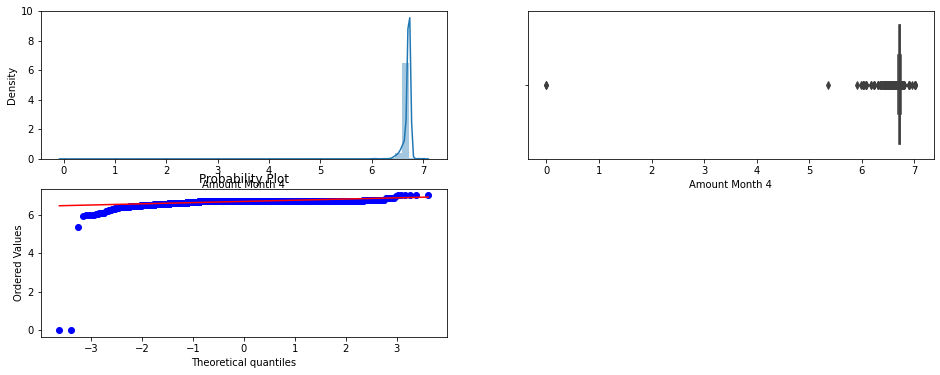

In [37]:
df['Amount Month 4']  = np.log1p(df['Amount Month 4'])

plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
sns.distplot(df['Amount Month 4'])
plt.subplot(2,2,2)
sns.boxplot(df['Amount Month 4'])
plt.subplot(2,2,3)
stats.probplot(df['Amount Month 4'], dist = 'norm', plot = plt)

In [38]:
df.isna().sum()

CompanyName                  0
Financial Department         0
Financial AccountGroup       0
VendorName                   0
Amount Month 1               0
Amount Month 2               0
Amount Month 3               0
Amount Month 4               0
Category                  1025
dtype: int64

## Analysing catagorical variables 

### Variable:CompanyName

In [39]:
df['CompanyName'].nunique()

9

In [40]:
df['CompanyName'].value_counts()

B3    1341
B1    1134
B8     548
B2     347
B5     346
B7     330
B0     303
B4     224
B6     147
Name: CompanyName, dtype: int64

<AxesSubplot:xlabel='CompanyName', ylabel='count'>

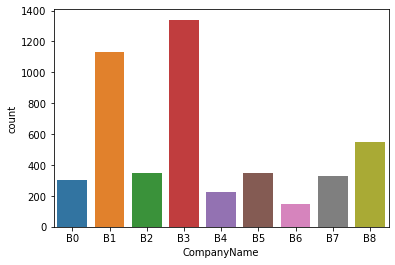

In [41]:
sns.countplot(df['CompanyName'])

In [42]:
pd.crosstab(df['CompanyName'],df['Category'])

Category,X0,X1,X2,X3,X4
CompanyName,,,,,
B0,279,15,3,6,0
B1,979,51,34,70,0
B2,277,37,14,19,0
B3,1169,64,39,56,13
B4,161,27,0,34,2
B5,271,38,27,10,0


Company B3 had higest tranction that too of X0 category whereas B4 had lowest tranctions.

### Variable :Financial Department

In [43]:
df['Financial Department'].nunique()

27

<AxesSubplot:xlabel='Financial Department', ylabel='count'>

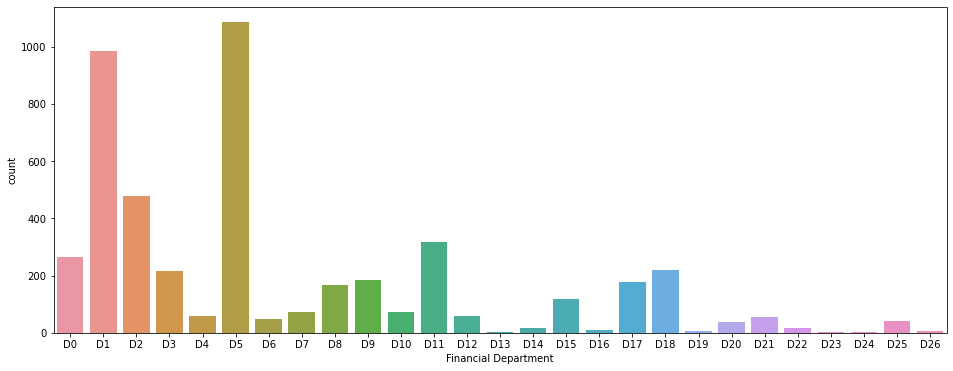

In [44]:

plt.figure(figsize=(16,6))
sns.countplot(df['Financial Department'])

In [45]:
pd.crosstab(df['Financial Department'],df['Category'])

Category,X0,X1,X2,X3,X4
Financial Department,,,,,
D0,226,19,2,16,1
D1,580,41,15,24,0
D10,60,4,8,2,0
D11,248,5,4,17,6
D12,52,2,0,6,0
D13,2,0,0,0,0
D14,16,0,0,0,0
D15,16,10,2,2,0
D16,8,0,0,2,0


Inference: Fincial department D5 done higest number of tranctions and D23 AND D24 had lowest tranctions

### Variable:Financial AccountGroup 

In [46]:
df["Financial AccountGroup"].nunique()

13

In [47]:
df["Financial AccountGroup"].value_counts()

C4     1129
C0     1068
C2      771
C7      522
C8      408
C5      325
C1      198
C6      107
C10      94
C9       60
C3       19
C12      16
C11       3
Name: Financial AccountGroup, dtype: int64

<AxesSubplot:xlabel='Financial AccountGroup', ylabel='count'>

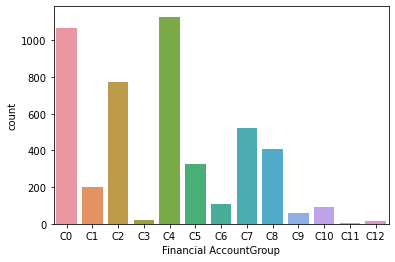

In [48]:

sns.countplot(df['Financial AccountGroup'])

In [49]:
pd.crosstab(df['Financial AccountGroup'],df['Category'])

Category,X0,X1,X2,X3,X4
Financial AccountGroup,,,,,
C0,840,18,12,22,5
C1,82,10,4,3,0
C10,70,6,3,11,4
C11,3,0,0,0,0
C12,10,2,3,1,0
C2,446,30,15,15,0
C3,13,3,0,3,0
C4,877,42,14,80,5
C5,182,25,6,24,0


### Variable:VendorName

In [50]:
df['VendorName'].nunique()

1509

In [51]:
df['VendorName'].value_counts()

E528     70
E25      48
E30      48
E29      45
E9       40
         ..
E969      1
E970      1
E971      1
E972      1
E1508     1
Name: VendorName, Length: 1509, dtype: int64

In [52]:
df['VendorName'].mode()

0    E528
dtype: object

In [53]:
df.groupby(['VendorName']).sum()

,Amount Month 1,Amount Month 2,Amount Month 3,Amount Month 4
VendorName,,,,
E0,20.509024,20.401070,20.257975,20.193682
E1,20.507895,20.401070,20.261923,20.193682
E10,27.344944,27.201426,27.015898,26.924909
E100,20.200756,20.265840,19.937605,19.879173
E1000,13.668983,13.599246,13.504478,13.459082
...,...,...,...,...
E995,41.008913,40.797208,40.515284,40.379798
E996,13.671512,13.598822,13.503974,13.462454
E997,6.817670,6.792835,6.753974,6.731227


### Target Variable : Category

In [54]:
df['Category'].value_counts()

X0    3136
X1     232
X3     195
X2     117
X4      15
Name: Category, dtype: int64

Apart from X0 category all other catogaries are very less in number, so need to make it balance using minority 
oversampling technique like SMOTE

<AxesSubplot:xlabel='Category', ylabel='count'>

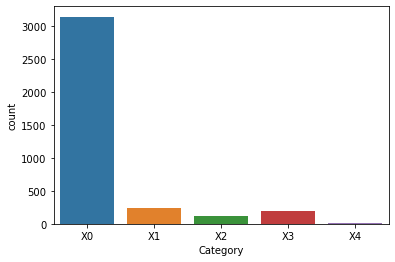

In [55]:
sns.countplot(df['Category'])

In [56]:
df.groupby(['Category'])['VendorName'].count()

Category
X0    3136
X1     232
X2     117
X3     195
X4      15
Name: VendorName, dtype: int64

Inference : X0 type tranctions done in max quantity where as x4 in lowest.

In [57]:
 x = df.drop(columns = ['Category'] , axis = 1)
 
 y = df['Category']
 y = y.iloc[:3695]
 y   

0       X0
1       X0
2       X0
3       X0
4       X0
        ..
3690    X1
3691    X1
3692    X0
3693    X1
3694    X1
Name: Category, Length: 3695, dtype: object

In [58]:
x.shape, y.shape

((4720, 8), (3695,))

In [59]:
# converting categorical variables to numerical variables

x= pd.get_dummies(x, drop_first = True)


In [60]:
test_data = x.iloc[ 3695: , : ]
# test_data = test_data.drop(['Category'], axis = 1)
test_data

,Amount Month 1,Amount Month 2,Amount Month 3,Amount Month 4,CompanyName_B1,CompanyName_B2,CompanyName_B3,CompanyName_B4,CompanyName_B5,CompanyName_B6,...,VendorName_E990,VendorName_E991,VendorName_E992,VendorName_E993,VendorName_E994,VendorName_E995,VendorName_E996,VendorName_E997,VendorName_E998,VendorName_E999
3695,6.836341,6.800174,6.753974,6.731227,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3696,6.836341,6.790604,6.731012,6.708904,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3697,6.836341,6.798654,6.753974,6.731227,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3698,6.836341,6.800357,6.753974,6.731227,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3699,6.836341,6.800357,6.750648,6.731227,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,6.706594,6.742772,6.618561,6.605416,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4716,6.612634,6.690856,6.503533,6.490303,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4717,6.687277,6.732040,6.679233,6.731227,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4718,6.836341,6.800357,6.753974,6.725426,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
 x= x.iloc[ :3695, :]

In [62]:
smote  = SMOTE( k_neighbors=5)
x_sm, y_sm = smote.fit_resample(x,y)

In [63]:
y_sm.value_counts()

X0    3136
X1    3136
X2    3136
X3    3136
X4    3136
Name: Category, dtype: int64

In [64]:
# importing train_test_split

from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x_sm,y_sm, test_size = 0.30, random_state = 1)


In [65]:
x_train.shape , y_train.shape , x_test.shape, y_test.shape

((10976, 1558), (10976,), (4704, 1558), (4704,))

#### ML Pipeline Building and Using Decision tree as estimator

In [66]:
trf1 = ColumnTransformer([('impute_companyname', SimpleImputer(strategy = 'most_frequent'),[0]),
                          ('impute_financial_department', SimpleImputer(strategy = 'most_frequent'),[1]),
                          ('impute_fincial_account_group', SimpleImputer(strategy = 'most_frequent'),[2]),
                          ('impute_vendor_name', SimpleImputer(strategy = 'most_frequent'),[3])],
                         remainder = 'passthrough')

trf2 = ColumnTransformer([('ohe_all_four',OneHotEncoder(sparse = False,handle_unknown = 'ignore'),[0,1,2,3])],
                        remainder = 'passthrough')

trf3 = ColumnTransformer([('scale', MinMaxScaler(),slice(0,1558))
                         ])


trf4 = SelectKBest(score_func = chi2,k = 7)

trf5 = DecisionTreeClassifier()

pipe_dt = Pipeline([('trf1',trf1),
                 ('trf2',trf2),
                 ('trf3',trf3),
                 ('trf4',trf4),
                 ('trf5',trf5),  
                ])                        

In [67]:
pipe_dt.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_companyname',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0]),
                                                 ('impute_financial_department',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [1]),
                                                 ('impute_fincial_account_group',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [2]),
                                                 ('impute_vendor_name',
                                                  SimpleImputer(strategy='most...),
                                                  [3])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_all_four',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 2, 3])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 1558, None))])),
                ('trf4',
                 SelectKBest(k=7,
                             score_func=<function chi2 at 0x000001F84967E1F0>)),
                ('trf5', DecisionTreeClassifier())])

In [68]:
pred  = pipe_dt.predict(x_test)
pred

array(['X1', 'X1', 'X1', ..., 'X1', 'X1', 'X1'], dtype=object)

In [69]:
print(confusion_matrix(y_test, pred))

print(" The accuracy score for Decision Tree model is  :", accuracy_score(y_test, pred))

print(" The precision score for Decision Tree model is :" ,precision_score(y_test,pred,average='weighted'))
print(" The recall score for Decision Tree model is    :",recall_score(y_test,pred,average='weighted'))

print(" The f1 score for Decision Tree model is        :", f1_score(y_test, pred,average='weighted'))

[[  0 955   0   0   0]
 [  0 934   0   0   0]
 [  0 951   0   0   0]
 [  0 913   0  22   0]
 [  0 841   0   0  88]]
 The accuracy score for Decision Tree model is  : 0.22193877551020408
 The precision score for Decision Tree model is : 0.4366263375180286
 The recall score for Decision Tree model is    : 0.22193877551020408
 The f1 score for Decision Tree model is        : 0.11041092772299055


In [70]:

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          X0       0.00      0.00      0.00       955
          X1       0.20      1.00      0.34       934
          X2       0.00      0.00      0.00       951
          X3       1.00      0.02      0.05       935
          X4       1.00      0.09      0.17       929

    accuracy                           0.22      4704
   macro avg       0.44      0.22      0.11      4704
weighted avg       0.44      0.22      0.11      4704



Decsion tree is performing  badly which comes to know from precision, Recall and f1 score fro all categories.
lets see how other algorithms perform on this acutely small amount of data.

In [71]:
from sklearn.model_selection import cross_val_score
tree  = DecisionTreeClassifier()
scores  = cross_val_score(pipe_dt,x_sm,y_sm, cv = 5, scoring  = 'accuracy')
scores

array([0.2244898 , 0.22767857, 0.22480867, 0.22257653, 0.22130102])

In [72]:
scores.mean()

0.22417091836734696

### 2. Model : Random Forest

In [73]:
trf1 = ColumnTransformer([('impute_companyname', SimpleImputer(strategy = 'most_frequent'),[0]),
                          ('impute_financial_department', SimpleImputer(strategy = 'most_frequent'),[1]),
                          ('impute_fincial_account_group', SimpleImputer(strategy = 'most_frequent'),[2]),
                          ('impute_vendor_name', SimpleImputer(strategy = 'most_frequent'),[3])],
                         remainder = 'passthrough')

trf2 = ColumnTransformer([('ohe_all_four',OneHotEncoder(sparse = False,handle_unknown = 'ignore'),[0,1,2,3])],
                        remainder = 'passthrough')

trf3 = ColumnTransformer([('scale', MinMaxScaler(),slice(0,1558))
                         ])

trf4 = SelectKBest(score_func = chi2,k = 7)

trf6 = RandomForestClassifier()

pipe_rf = Pipeline([('trf1',trf1),
                 ('trf2',trf2),
                 ('trf3',trf3),
                 ('trf4',trf4),
                 ('trf6',trf6)])

In [74]:
pipe_rf.fit(x_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_companyname',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0]),
                                                 ('impute_financial_department',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [1]),
                                                 ('impute_fincial_account_group',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [2]),
                                                 ('impute_vendor_name',
                                                  SimpleImputer(strategy='most...),
                                                  [3])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_all_four',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 2, 3])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 1558, None))])),
                ('trf4',
                 SelectKBest(k=7,
                             score_func=<function chi2 at 0x000001F84967E1F0>)),
                ('trf6', RandomForestClassifier())])

In [75]:
prediction = pipe_rf.predict(x_test)

In [76]:
print( "The accuracy score for random forest model is   :",  accuracy_score(y_test,prediction))
print( "The precision score for random forest model is  :",  precision_score(y_test,prediction,average='weighted'))

print( "The recall score for random forest model is     :", recall_score(y_test,prediction,average='weighted'))
print( "The f1 score for random forest model is         :", f1_score(y_test, prediction,average='weighted'))

print ("The confusion matrix : \n ", confusion_matrix(y_test, prediction))

The accuracy score for random forest model is   : 0.22193877551020408
The precision score for random forest model is  : 0.4366263375180286
The recall score for random forest model is     : 0.22193877551020408
The f1 score for random forest model is         : 0.11041092772299055
The confusion matrix : 
  [[  0 955   0   0   0]
 [  0 934   0   0   0]
 [  0 951   0   0   0]
 [  0 913   0  22   0]
 [  0 841   0   0  88]]


In [77]:

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

          X0       0.00      0.00      0.00       955
          X1       0.20      1.00      0.34       934
          X2       0.00      0.00      0.00       951
          X3       1.00      0.02      0.05       935
          X4       1.00      0.09      0.17       929

    accuracy                           0.22      4704
   macro avg       0.44      0.22      0.11      4704
weighted avg       0.44      0.22      0.11      4704



In [78]:
from sklearn.metrics import SCORERS
(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [79]:
trf6 = RandomForestClassifier()
scores_rfc  = cross_val_score(pipe_rf,x_sm,y_sm, cv = 5, scoring  = 'f1_weighted')
scores_rfc

array([0.11433084, 0.12003398, 0.11419032, 0.10999111, 0.10771326])

In [80]:
scores_rfc.mean()

0.11325190112267033

 Random Forest : Hyperparameter Tunning

In [81]:

n_estimators  = [20,40,60]

max_features =[0.2,0.6,0.8]

max_depth  = [2,8,None]

max_samples  = [0.5,0.75,1]

In [82]:
param_grid  = {'n_estimators': n_estimators,
                'max_features' : max_features,
               'max_depth'   : max_depth,
               'max_samples' : max_samples
              }
print(param_grid)

{'n_estimators': [20, 40, 60], 'max_features': [0.2, 0.6, 0.8], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1]}


In [83]:
rf = RandomForestClassifier()


In [84]:

rfc_grid  = GridSearchCV(estimator= rf,
                        param_grid  = param_grid,
                        verbose = 2,
                        n_jobs  = -1)



'\nrfc_grid  = GridSearchCV(estimator= rf,\n                        param_grid  = param_grid,\n                        verbose = 2,\n                        n_jobs  = -1)\n'

In [85]:

rfc_grid.fit(x_train, y_train)


'\nrfc_grid.fit(x_train, y_train)\n'

In [86]:

rfc_grid.best_params_


'\nrfc_grid.best_params_\n'

In [87]:

rfc_grid.best_score_


'\nrfc_grid.best_score_\n'

In [88]:
trf6 = RandomForestClassifier(max_depth=None,max_features= 0.8,max_samples= 0.75,n_estimators= 60, random_state =2)
pipe_rf.fit(x_train,y_train)
rf_pred = pipe_rf.predict(x_test)

print( "The accuracy score for random forest model is  :",  accuracy_score(y_test,rf_pred ))
print( "The precision score for random forest model is :",  precision_score(y_test,rf_pred ,average='weighted'))

print( "The recall score for random forest model is    :", recall_score(y_test,rf_pred ,average='weighted'))
print( "The f1 score for random forest model is        :", f1_score(y_test,rf_pred ,average='weighted'))

print ("The confusion matrix \n ", confusion_matrix(y_test,rf_pred ))

The accuracy score for random forest model is  : 0.22193877551020408
The precision score for random forest model is : 0.4366263375180286
The recall score for random forest model is    : 0.22193877551020408
The f1 score for random forest model is        : 0.11041092772299055
The confusion matrix 
  [[  0 955   0   0   0]
 [  0 934   0   0   0]
 [  0 951   0   0   0]
 [  0 913   0  22   0]
 [  0 841   0   0  88]]


#### 3. Model : Gradientboost classifier

In [89]:

trf1 = ColumnTransformer([('impute_companyname', SimpleImputer(strategy = 'most_frequent'),[0]),
                          ('impute_financial_department', SimpleImputer(strategy = 'most_frequent'),[1]),
                          ('impute_fincial_account_group', SimpleImputer(strategy = 'most_frequent'),[2]),
                          ('impute_vendor_name', SimpleImputer(strategy = 'most_frequent'),[3])],
                         remainder = 'passthrough')

trf2 = ColumnTransformer([('ohe_all_four',OneHotEncoder(sparse = False,handle_unknown = 'ignore'),[0,1,2,3])],
                        remainder = 'passthrough')

trf3 = ColumnTransformer([('scale', MinMaxScaler(),slice(0,1558))
                         ])

trf4 = SelectKBest(score_func = chi2,k = 7)

trf7 =  GradientBoostingClassifier()

pipe_gb = Pipeline([('trf1',trf1),
                 ('trf2',trf2),
                 ('trf3',trf3),
                 ('trf4',trf4),
                 ('trf7',trf7)])

pipe_gb.fit(x_train, y_train)
gbc_pred = pipe_gb.predict(x_test)


In [90]:
gbc_pred

array(['X1', 'X1', 'X1', ..., 'X1', 'X1', 'X1'], dtype=object)

In [91]:
print( "the accuracy score for Gradient Boosing calssifier model is  :",  accuracy_score(y_test, gbc_pred))
print( "the precision score for Gradient Boosing calssifier model is :",  precision_score(y_test, gbc_pred,average='weighted'))

print( "the recall score for Gradient Boosing calssifier model is    :",  recall_score(y_test, gbc_pred,average='weighted'))
print( "the f1 score for Gradient Boosing calssifier model is        :",  f1_score(y_test, gbc_pred,average='weighted'))

print ("the confusion matrix for GBC model is \n ", confusion_matrix(y_test, gbc_pred))

the accuracy score for Gradient Boosing calssifier model is  : 0.22193877551020408
the precision score for Gradient Boosing calssifier model is : 0.4366263375180286
the recall score for Gradient Boosing calssifier model is    : 0.22193877551020408
the f1 score for Gradient Boosing calssifier model is        : 0.11041092772299055
the confusion matrix for GBC model is 
  [[  0 955   0   0   0]
 [  0 934   0   0   0]
 [  0 951   0   0   0]
 [  0 913   0  22   0]
 [  0 841   0   0  88]]


 Gradientboost: Hyperparameter Tunning

In [92]:
n_estimators =[20,40,]

max_depth  =  [2,6]

max_features = [0.2,0.4]

In [93]:
para_grid ={ 'n_estimators' :n_estimators,
            
             'max_depth'    : max_depth,
            
             'max_features': max_features
           }
print(para_grid)

{'n_estimators': [20, 40], 'max_depth': [2, 6], 'max_features': [0.2, 0.4]}


In [94]:

gb = GradientBoostingClassifier()
gb_grid = GridSearchCV(estimator = gb,
                      param_grid=para_grid,
                      n_jobs = -1)
gb_grid.fit(x_train,y_train)



'\ngb = GradientBoostingClassifier()\ngb_grid = GridSearchCV(estimator = gb,\n                      param_grid=para_grid,\n                      n_jobs = -1)\ngb_grid.fit(x_train,y_train)\n'

In [95]:

gb_grid.best_params_


'\ngb_grid.best_params_\n'

In [96]:
trf7 = GradientBoostingClassifier(max_depth= 6, max_features= 0.4, n_estimators= 40)
pipe_gb.fit(x_train, y_train)
gb_pred =pipe_gb.predict(x_test)

In [97]:
print( "the accuracy score for Gradient Boosing calssifier model is  :",  accuracy_score(y_test, gb_pred))

print( "the precision score for Gradient Boosing calssifier model is :",  precision_score(y_test, gb_pred,average='weighted'))
print( "the recall score for Gradient Boosing calssifier model is    :",  recall_score(y_test, gb_pred,average='weighted'))

print( "the f1 score for Gradient Boosing calssifier model is        :",  f1_score(y_test, gb_pred,average='weighted'))
print ("the confusion matrix for GBC model is \n ", confusion_matrix(y_test, gb_pred))

the accuracy score for Gradient Boosing calssifier model is  : 0.22193877551020408
the precision score for Gradient Boosing calssifier model is : 0.4366263375180286
the recall score for Gradient Boosing calssifier model is    : 0.22193877551020408
the f1 score for Gradient Boosing calssifier model is        : 0.11041092772299055
the confusion matrix for GBC model is 
  [[  0 955   0   0   0]
 [  0 934   0   0   0]
 [  0 951   0   0   0]
 [  0 913   0  22   0]
 [  0 841   0   0  88]]


#### 4. model : XGBoost 
    

In [98]:

trf1 = ColumnTransformer([('impute_companyname', SimpleImputer(strategy = 'most_frequent'),[0]),
                          ('impute_financial_department', SimpleImputer(strategy = 'most_frequent'),[1]),
                          ('impute_fincial_account_group', SimpleImputer(strategy = 'most_frequent'),[2]),
                          ('impute_vendor_name', SimpleImputer(strategy = 'most_frequent'),[3])],
                         remainder = 'passthrough')

trf2 = ColumnTransformer([('ohe_all_four',OneHotEncoder(sparse = False,handle_unknown = 'ignore'),[0,1,2,3])],
                        remainder = 'passthrough')

trf3 = ColumnTransformer([('scale', MinMaxScaler(),slice(0,1558))
                         ])

trf4 = SelectKBest(score_func = chi2,k = 7)

trf8 = XGBClassifier()

pipe_xgb = Pipeline([('trf1',trf1),
                 ('trf2',trf2),
                 ('trf3',trf3),
                 ('trf4',trf4),
                 ('trf8',trf8)])

In [99]:
pipe_xgb.fit(x_train, y_train)

[19:16:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_companyname',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0]),
                                                 ('impute_financial_department',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [1]),
                                                 ('impute_fincial_account_group',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [2]),
                                                 ('impute_vendor_name',
                                                  SimpleImputer(strategy='most...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [100]:
xgb_pred = pipe_xgb.predict(x_test)

In [101]:
print( "The accuracy score for XGBCcalssifier model is :",  accuracy_score(y_test, xgb_pred))
print( "The precision score forXGBCcalssifier model is :",  precision_score(y_test, xgb_pred,average='weighted'))

print( "The recall score for XGBCcalssifier model is   :",  recall_score(y_test, xgb_pred,average='weighted'))
print( "The f1 score for XGBCcalssifier model is       :",  f1_score(y_test,xgb_pred,average='weighted'))

print ("The confusion matrix for XGBCcalssifier model is:\n", confusion_matrix(y_test,xgb_pred))

The accuracy score for XGBCcalssifier model is : 0.22193877551020408
The precision score forXGBCcalssifier model is : 0.4366263375180286
The recall score for XGBCcalssifier model is   : 0.22193877551020408
The f1 score for XGBCcalssifier model is       : 0.11041092772299055
The confusion matrix for XGBCcalssifier model is:
 [[  0 955   0   0   0]
 [  0 934   0   0   0]
 [  0 951   0   0   0]
 [  0 913   0  22   0]
 [  0 841   0   0  88]]


XGBoost : HyperParameter Tunning

In [102]:
# randimoised search cv

n_estimators = [20,40,60,100]

max_features =[0.2,0.4,0.6]

max_depth = [2,8,None]

max_samples = [0.25,0.4,0.8,1.0]

min_samples_split = [2,5]

In [103]:

param_grid ={'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth'   : max_depth,
              'max_samples' : max_samples,
             'min_samples_split' : min_samples_split, 
            }
print(param_grid)

xgb  = XGBClassifier()



{'n_estimators': [20, 40, 60, 100], 'max_features': [0.2, 0.4, 0.6], 'max_depth': [2, 8, None], 'max_samples': [0.25, 0.4, 0.8, 1.0], 'min_samples_split': [2, 5]}


In [104]:

xgb_grid = GridSearchCV(estimator = xgb,
                      param_grid=param_grid,
                      n_jobs = -1)
xgb_grid.fit(x_train,y_train)


xgb_grid.best_params_



'\nxgb_grid = GridSearchCV(estimator = xgb,\n                      param_grid=param_grid,\n                      n_jobs = -1)\nxgb_grid.fit(x_train,y_train)\n\n\nxgb_grid.best_params_\n'

In [105]:
trf8  = XGBClassifier(n_estimators= 60,min_samples_split= 5,min_samples_leaf= 2,max_samples= 0.8,max_features= 0.2,
                     max_depth= None)
pipe_xgb.fit(x_train,y_train)
xgb_prediction = pipe_xgb.predict(x_test)


[19:16:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [106]:
print( "The accuracy score for XGBCcalssifier model is :",  accuracy_score(y_test, xgb_prediction))
print( "The precision score forXGBCcalssifier model is :",  precision_score(y_test, xgb_prediction,average='weighted'))

print( "The recall score for XGBCcalssifier model is   :",  recall_score(y_test, xgb_prediction,average='weighted'))
print( "The f1 score for XGBCcalssifier model is       :",  f1_score(y_test,xgb_prediction,average='weighted'))

print ("The confusion matrix for XGBCcalssifier model is:\n", confusion_matrix(y_test,xgb_prediction))

The accuracy score for XGBCcalssifier model is : 0.22193877551020408
The precision score forXGBCcalssifier model is : 0.4366263375180286
The recall score for XGBCcalssifier model is   : 0.22193877551020408
The f1 score for XGBCcalssifier model is       : 0.11041092772299055
The confusion matrix for XGBCcalssifier model is:
 [[  0 955   0   0   0]
 [  0 934   0   0   0]
 [  0 951   0   0   0]
 [  0 913   0  22   0]
 [  0 841   0   0  88]]


#### Conclusion:
It is quite evident from performace metrics of all Estimators that how critical the amount of data for prediction.Even after increasing quantity of minority class by SMOTE and Hyperparameter optimization accurcay was pretty same.

Prediction:

In [107]:
final_prediction  = pipe_xgb.predict(test_data)
final_prediction 

array(['X1', 'X1', 'X1', ..., 'X1', 'X1', 'X1'], dtype=object)

In [108]:
submission  =pd.DataFrame()
submission['Category'] = final_prediction 
submission

,Category
0,X1
1,X1
2,X1
3,X1
4,X1
...,...
1020,X1
1021,X1
1022,X1
1023,X1


In [109]:
import pickle
pickle.dump(pipe_xgb,open('model_save','wb'))

In [110]:
loded_model  = pickle.load(open('model_save', 'rb'))
loded_model.predict(test_data)



array(['X1', 'X1', 'X1', ..., 'X1', 'X1', 'X1'], dtype=object)